<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/japan_stock_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# イントロ (本論との関係はあるような，ないような・・・)
新型コロナウイルスに対抗するワクチン開発競争が激化する中，最近，英国のアストラゼネカ社の「治験一時中止および再開」のニュースが大きく取り上げられた。

- 5月21日: 英アストラゼネカ、ワクチン9月に供給へ　10億回分生産
https://www.nikkei.com/article/DGXMZO59422770R20C20A5000000/

- 8月26日: 英アストラゼネカ　新型コロナの抗体医薬、治験開始
https://www.nikkei.com/article/DGXMZO63050910W0A820C2000000/

- 9月9日: 英アストラゼネカ、ワクチン最終治験一時中断　米報道
https://www.nikkei.com/article/DGXMZO63611970Z00C20A9000000/

- 9月12日: アストラゼネカ、英での治験再開　新型コロナワクチン
https://www.nikkei.com/article/DGXMZO63788200S0A910C2I00000/

こういう旬なニュースは株価に影響を与えるのかな？

ということで，株価データを取得してプロットして見ましょう。

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


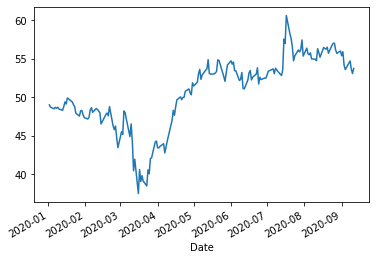

In [1]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime

start=datetime(2020, 1, 1)
end=datetime(2020, 9, 14)

# AZN : アストラゼネカの ticker symbol
df = data.DataReader('AZN', "yahoo", start, end)
    
df['Adj Close'].plot()

# 経済データの分析：株価の時系列相関
今回は，第11回(7月16日)に取り上げた「株価の相関」の焼き直しであり，ヒートマップによる可視化等を取り入れた点が異なる。

(メモ) seaborn で日本語を表示させるにはフォントのインストールが必要なようだ。
記述の簡便さでは seaborn 一択だが，日本企業の企業名を表示する際に都合が悪いため，plotly express を用いる。

## ヒートマップとは
最初にデータをとってくる。（seaborn のサンプルデータを利用する）

In [2]:
import seaborn as sns

# データ読み込み
flights = sns.load_dataset("flights")

In [3]:
flights.head(15)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [4]:
#ピボット生成（データの並べ替え）
flights = flights.pivot(index="month", columns="year", values="passengers")

In [5]:
# データの中身を眺める
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


### Seaborn でヒートマップを描く
(メモ) color map : https://matplotlib.org/examples/color/colormaps_reference.html

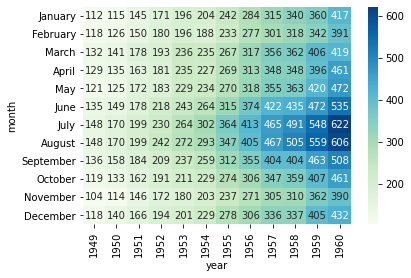

In [6]:
import seaborn as sns

flights = sns.load_dataset("flights")
flights = flights.pivot(index="month", columns="year", values="passengers") #ピボット生成

# 乗客数のヒートマップ
sns.heatmap(flights, cmap='GnBu', annot=True, fmt="d") # annnotation のフォーマットは整数 (decimal)

### plotly でヒートマップを描く

In [8]:
import plotly.figure_factory as ff
import seaborn as sns
import numpy as np

# データは seaborn の flight data を借用
flights = sns.load_dataset("flights")
flights = flights.pivot(index="month", columns="year", values="passengers") #ピボット生成

# plotly を用いたヒートマップ
z = flights.values # 乗客数(passengers)を numpy.ndarray として取り出す
z_text = np.around(z, decimals=2) # アノテート・テキストを小数点以下２位までとする
fig = ff.create_annotated_heatmap(z=z, annotation_text=z_text, x=list(flights.columns),
                                  y=list(flights.index), colorscale='Blues',
                                  hoverinfo='none')
fig['layout']['yaxis']['autorange'] = "reversed" # これがないと縦軸が（思ったのと）逆順になる
fig.update_layout(height=400, width=600, showlegend=False)
fig.write_html('flights_heatmap.html', auto_open=False)
fig.show()

# GAFA の株価の相関
https://baseball-y-programming.com/python-gafa-stock-correlation/

### データの取得と可視化（前回までのやり方）
各社の ticker symbol を個々に DataReader に渡し，異なるデータフレームを作っていた。

In [9]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime

start=datetime(2020, 1, 1)
end=datetime(2020, 8, 31)

gafa_tickers = ["GOOG","AAPL","FB","AMZN"]
df = {}

for ticker in gafa_tickers:
    df[ticker] = data.DataReader(ticker, "yahoo", start, end)

In [10]:
df['GOOG'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1368.140015,1341.550049,1341.550049,1367.369995,1406600,1367.369995
2020-01-03,1372.500000,1345.543945,1347.859985,1360.660034,1186400,1360.660034
2020-01-06,1396.500000,1350.000000,1350.000000,1394.209961,1732300,1394.209961
2020-01-07,1402.989990,1390.380005,1397.939941,1393.339966,1502700,1393.339966
2020-01-08,1411.579956,1390.839966,1392.079956,1404.319946,1528000,1404.319946


In [11]:
df['FB'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999
2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998
2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006
2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400,213.059998
2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000,215.220001


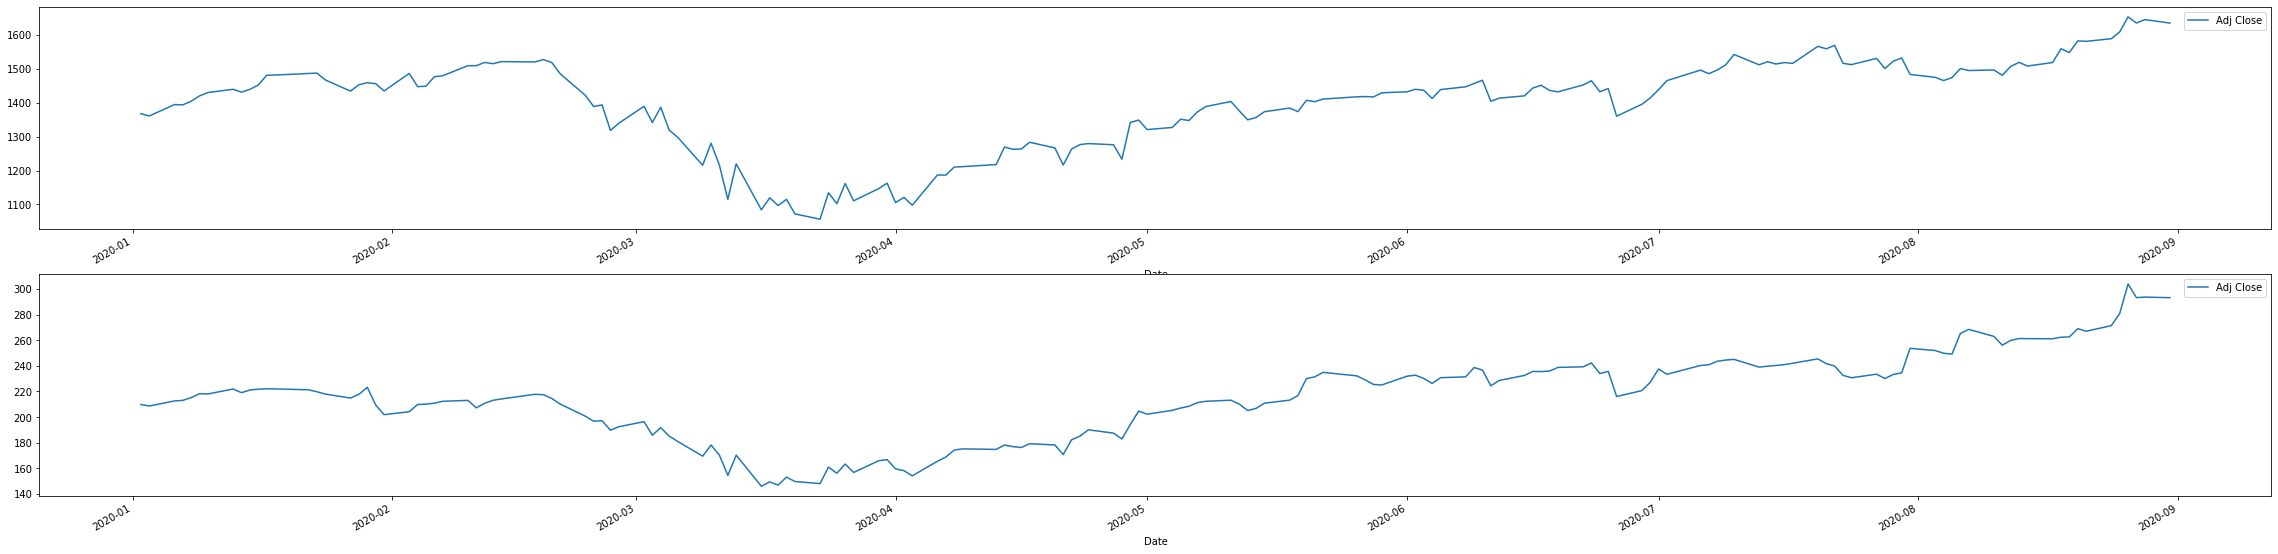

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1)
df['GOOG']['Adj Close'].plot(ax=axes[0], figsize=(40,10), legend=True)
df['FB']['Adj Close'].plot(ax=axes[1], figsize=(40,10), legend=True)

# (メモ) 軸ラベル等が小さくて見えないが，傾向を見たいだけだから，これ以上は頑張らない

### データの取得と可視化（今回のやり方）
実は DataReader に「取得したい企業の ticker symbol のリスト」を与えると，ひとつのデータフレームで扱える。

In [13]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime

start=datetime(2020, 1, 1)
end=datetime(2020, 8, 31)

# 各社の調整済み終値を取得
# Google, Apple, Facebook, Amazon の終値をひとつのデータフレームへ押し込む
df = data.DataReader(gafa_tickers, "yahoo", start, end)["Adj Close"]
df.head()

Symbols,GOOG,AAPL,FB,AMZN
Date,,,,
2020-01-02,1367.369995,74.573036,209.779999,1898.010010
2020-01-03,1360.660034,73.848030,208.669998,1874.969971
2020-01-06,1394.209961,74.436470,212.600006,1902.880005
2020-01-07,1393.339966,74.086395,213.059998,1906.859985
2020-01-08,1404.319946,75.278160,215.220001,1891.969971


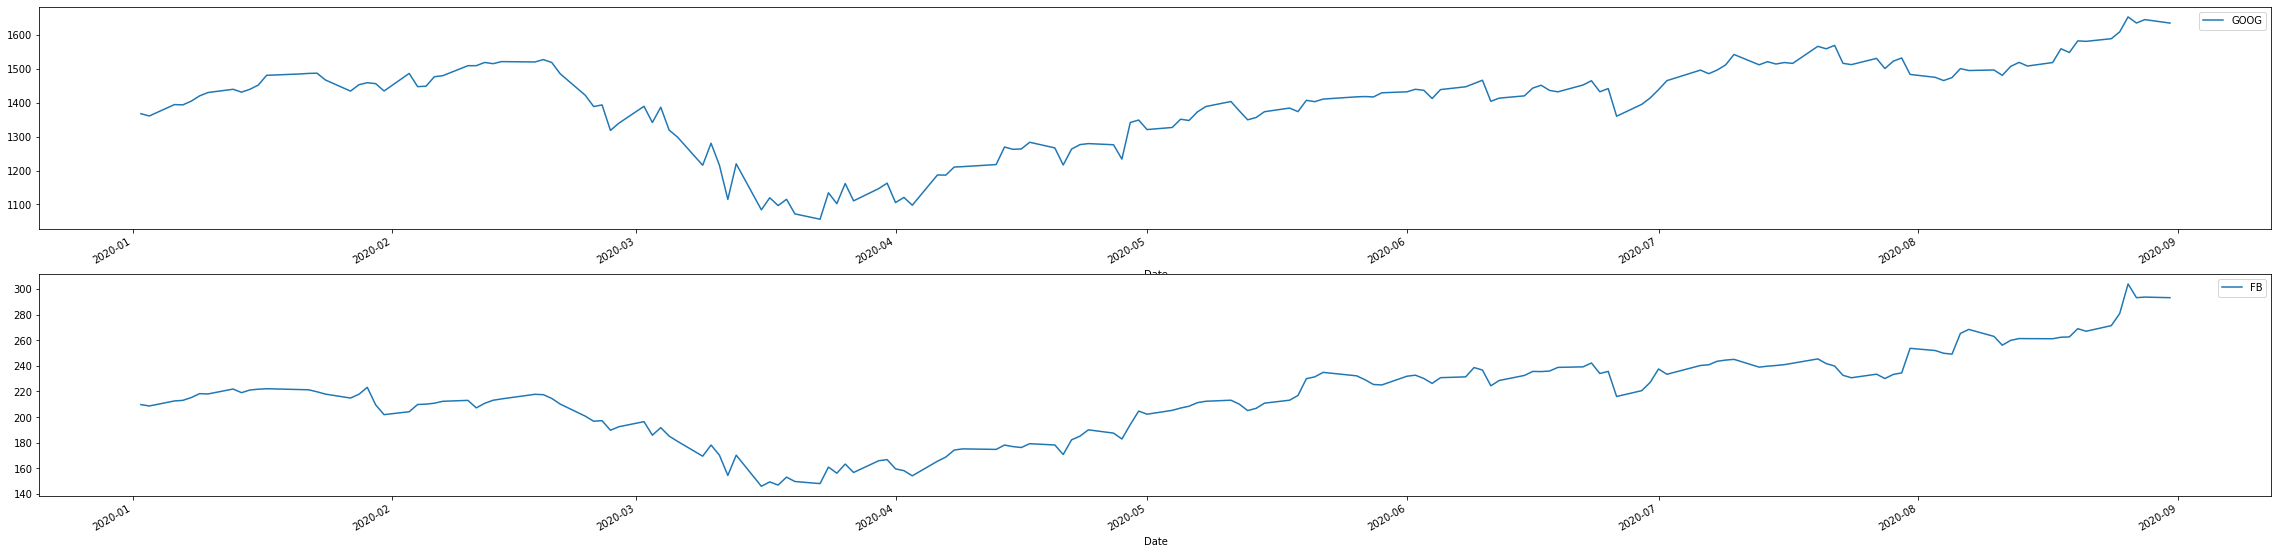

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1)
df['GOOG'].plot(ax=axes[0], figsize=(40,10), legend=True)
df['FB'].plot(ax=axes[1], figsize=(40,10), legend=True)

### 株価の変化率を求める (ここから本番)

In [15]:
# 日毎の株価の変化率を求める → 前の行との変化率を求める pct_change() メソッドを利用
# 詳細は https://note.nkmk.me/python-pandas-diff-pct-change/ を参照
df_ratio = df.pct_change()
df_ratio.head()

Symbols,GOOG,AAPL,FB,AMZN
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.004907,-0.009722,-0.005291,-0.012139
2020-01-06,0.024657,0.007968,0.018834,0.014886
2020-01-07,-0.000624,-0.004703,0.002164,0.002092
2020-01-08,0.007880,0.016086,0.010138,-0.007809


### 散布図 with ヒストグラムの描画
Google と Facebook の株価変化率を散布図にプロットしてみる。

In [16]:
import plotly.express as px
fig = px.scatter(df_ratio, x="GOOG", y="FB",
                marginal_x="histogram", marginal_y="histogram")
fig.show()

### 各社の相関をヒートマップで表示
上記は Google と Facebook の２社だったが，複数社を比較したい場合，ヒートマップが分かりやすい。

In [17]:
import plotly.figure_factory as ff

# plotly を用いたヒートマップ
z = df_ratio.corr().values # 乗客数(passengers)を numpy.ndarray として取り出す
z_text = np.around(z, decimals=2) # アノテート・テキストを小数点以下２位までとする
fig = ff.create_annotated_heatmap(z=z, annotation_text=z_text, x=list(df_ratio.columns),
                                  y=list(df_ratio.columns), colorscale='Blues',
                                  hoverinfo='none')
fig['layout']['yaxis']['autorange'] = "reversed" # これがないと縦軸が（思ったのと）逆順になる
fig.update_layout(height=400, width=400, showlegend=False)
fig.write_html('flights_heatmap.html', auto_open=False)
fig.show()

## 以上をまとめると

In [18]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime
import plotly.figure_factory as ff
import numpy as np

start=datetime(2020, 1, 1)
end=datetime(2020, 8, 31)

gafa_tickers = ["GOOG","AAPL","FB","AMZN"]

# 各社の調整済み終値を取得
df = data.DataReader(gafa_tickers, "yahoo", start, end)["Adj Close"]

# 前の行との変化率を求める pct_change() メソッド：
# https://note.nkmk.me/python-pandas-diff-pct-change/
df_ratio = df.pct_change()

# plotly を用いたヒートマップ
z = df_ratio.corr().values # 乗客数(passengers)を numpy.ndarray として取り出す
z_text = np.around(z, decimals=2) # アノテート・テキストを小数点以下２位までとする
fig = ff.create_annotated_heatmap(z=z, annotation_text=z_text, x=list(df_ratio.columns),
                                  y=list(df_ratio.columns), colorscale='Blues',
                                  hoverinfo='none')
fig['layout']['yaxis']['autorange'] = "reversed" # これがないと縦軸が（思ったのと）逆順になる
fig.update_layout(height=400, width=400, showlegend=False)
fig.write_html('flights_heatmap.html', auto_open=False)
fig.show()

## 米国市場に上場している製薬会社に注目
Yahoo! Finance からデータが取れる（しかも制限なし！）企業は相当数，存在する。

その中で，新型コロナウイルスに対するワクチン開発でしのぎを削る製薬業界に注目する。

具体的には
http://nasdaqchart.com/special/pharmacysocialmedia/%E4%B8%96%E7%95%8C%E7%9A%84%E3%81%AB%E6%9C%89%E5%90%8D%E3%81%AA%E8%A3%BD%E8%96%AC%E4%BC%9A%E7%A4%BE%E3%81%AE%E3%82%BD%E3%83%BC%E3%82%B7%E3%83%A3%E3%83%AB%E3%83%A1%E3%83%87%E3%82%A3%E3%82%A2%E4%B8%80%E8%A6%A7
に掲載されている製薬会社を取り上げる。

今回は以下の 10社に注目する。（下記の表記は「ticker symbol : 社名」である）

- PFE : ファイザー
- NVS : ノバルティス
- MRK : 米メルク
- GSK : グラクソ・スミスクライン
- JNJ : ジョンソン＆ジョンソン
- ABBV : アッヴィ
- LLY : イーライリリー Eli Lilly and Company
- AMGN : アムジェン
- GILD : ギリアド・サイエンシズ
- AZN : アストラゼネカ


In [19]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime
import plotly.figure_factory as ff
import numpy as np

# 新型コロナウイルスが見つかった2020年1月から8月末までを分析対象とする
start=datetime(2020, 1, 1)
end=datetime(2020, 8, 31)

# ticker symbols
pharma_tickers = ["PFE", "NVS", "MRK", "GSK", "JNJ", "ABBV", "LLY", "AMGN", "GILD", "AZN"]

# 各社の調整済み終値を取得
df = data.DataReader(pharma_tickers, "yahoo", start, end)["Adj Close"]

# 株価の変化率を求める
# 前の行との変化率を求める pct_change() メソッド：
# https://note.nkmk.me/python-pandas-diff-pct-change/
df_ratio = df.pct_change()

# 各社の相関をヒートマップで表示 (plotly を用いたヒートマップ)
z = df_ratio.corr().values # 株価変化率の相関を numpy.ndarray として取り出す
z_text = np.around(z, decimals=2) # アノテート・テキストを小数点以下２位までとする
fig = ff.create_annotated_heatmap(z=z, annotation_text=z_text, x=list(df_ratio.columns),
                                  y=list(df_ratio.columns), colorscale='Blues',
                                  hoverinfo='none')
fig['layout']['yaxis']['autorange'] = "reversed" # これがないと縦軸が（思ったのと）逆順になる
fig.update_layout(height=400, width=600, showlegend=False)
fig.write_html('flights_heatmap.html', auto_open=False)
fig.show()

レムデシビルを手がける，GILD (ギリアド・サイエンシズ) のみ他社との相関が小さい。

なんだこれ？ 株価推移をプロットしてみよう！

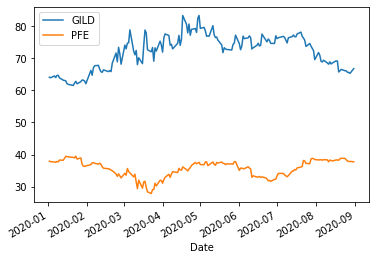

In [20]:
df['GILD'].plot(legend=True)
df['PFE'].plot(legend=True)

２〜４月および７月中旬以降の株価の動きがファイザーと異なる。（むしろ逆の値動き？）

次に，株価変化率の相関を散布図に落とし込む。

In [21]:
import plotly.express as px
fig = px.scatter(df_ratio, x="GILD", y="PFE",
                marginal_x="histogram", marginal_y="histogram")
fig.show()

## 日本の製薬会社を対象とした分析
日経平均銘柄のうち医薬品に分類される９銘柄を対象とする。
具体的な社名は下記の Wikipedia を参照のこと：

https://ja.wikipedia.org/wiki/%E6%97%A5%E7%B5%8C%E5%B9%B3%E5%9D%87%E6%A0%AA%E4%BE%A1#:~:text=%E6%97%A5%E7%B5%8C%E5%B9%B3%E5%9D%87%E6%A0%AA%E4%BE%A1%EF%BC%88%E3%81%AB%E3%81%A3%E3%81%91%E3%81%84%E3%81%B8,%E3%81%AB%E3%83%BC%E3%81%94%EF%BC%89%E3%81%A8%E3%82%82%E5%91%BC%E3%81%B0%E3%82%8C%E3%82%8B%E3%80%82&text=%E7%8F%BE%E5%9C%A8%E3%80%81%E6%9D%B1%E4%BA%AC%E8%A8%BC%E5%88%B8%E5%8F%96%E5%BC%95%E6%89%80,%E3%82%92%E5%AF%BE%E8%B1%A1%E3%81%AB%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%80%82

予めファイル pharma_jp_code.csv にこれら９社のコードと社名を書いておく。
これは前回の授業で用いた NIKKEI225_CODE.csv から手動で抜き出したものである。

### (準備) Google Drive のマウント

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 日経平均銘柄の株価の取得

In [60]:
import pandas as pd
from pandas_datareader import data
from datetime import datetime

companies = pd.read_csv("/content/drive/My Drive/BASE2/EconomicData/pharma_jp_code.csv")

# ticker code のリストを作る（データ取得の際に利用）
company_tickers = []
for code in companies['CODE']: # (メモ) リスト内包表記でシンプルにできる
    company_tickers.append(str(code) + '.JP')
    
# 会社名をリスト化（データを見やすくする ＆ 可視化の際に利用）
company_names = companies['NAME'].tolist()

In [61]:
company_tickers

['4151.JP',
 '4502.JP',
 '4503.JP',
 '4506.JP',
 '4507.JP',
 '4519.JP',
 '4523.JP',
 '4568.JP',
 '4578.JP']

In [62]:
company_names

['協和発酵キリン',
 '武田薬品工業',
 'アステラス製薬',
 '大日本住友製薬',
 '塩野義製薬',
 '中外製薬',
 'エーザイ',
 '第一三共',
 '大塚ホールディングス']

In [63]:
# データ取得
# 例によって，stooq からデータを取得する
#（メモ）2015.09.16〜2020.09.11 が取れてしまう。start, end が効いていない！
start=datetime(2020, 1, 1)
end=datetime(2020, 8, 31)

df = data.DataReader(company_tickers, "stooq", start, end)

import pickle
with open("/content/drive/My Drive/BASE2/EconomicData/pharma_jp.pickle", "wb") as f:
    pickle.dump(df, f)

## 何度か試すうち，stooq へアクセスしすぎて，Exceeded the daily hits limit が出ちまった！

## という訳で，上記では取得したデータを pickle 化して保存しています。

In [77]:
# データ読み込み
import pickle
with open("/content/drive/My Drive/BASE2/EconomicData/pharma_jp.pickle", "rb") as f:
    df = pickle.load(f)

# 終値のみに注目する
# 上記の start / end が効いていないバグに対応するため，ここで 2020年度のデータに限定する
# (メモ) このバグは Anaconda 上では生じない。
df = df['2020']["Close"]

In [79]:
df.head()

Symbols,4151.JP,4502.JP,4503.JP,4506.JP,4507.JP,4519.JP,4523.JP,4568.JP,4578.JP
Date,,,,,,,,,
2020-09-11,2854.0,3913.0,1620.5,1371.0,5798.0,4782.0,9280.0,9800.0,4539.0
2020-09-10,2839.0,3868.0,1610.0,1348.0,5798.0,4709.0,9231.0,9464.0,4515.0
2020-09-09,2790.0,3815.0,1615.0,1320.0,5780.0,4627.0,9213.0,9320.0,4453.0
2020-09-08,2853.0,3830.0,1635.0,1347.0,5852.0,4759.0,9278.0,9393.0,4513.0
2020-09-07,2809.0,3800.0,1618.5,1295.0,5777.0,4708.0,9405.0,9294.0,4454.0


In [80]:
# 列名が分かりづらいから社名に置き換え
df.columns = company_names

In [81]:
# 月日 (date) を昇順に並べ替える
df = df.sort_index()

In [82]:
df.head()

,協和発酵キリン,武田薬品工業,アステラス製薬,大日本住友製薬,塩野義製薬,中外製薬,エーザイ,第一三共,大塚ホールディングス
Date,,,,,,,,,
2020-01-06,2510.80,4159.71,1797.90,2069.57,6542.41,3318.02,7906.22,7005.60,4750.90
2020-01-07,2564.39,4176.26,1827.06,2099.27,6636.50,3375.44,8024.00,7002.61,4866.70
2020-01-08,2561.41,4138.29,1806.31,2049.76,6601.84,3365.49,7892.36,6990.67,4762.78
2020-01-09,2626.91,4227.87,1825.58,2108.19,6746.45,3445.14,8054.68,7120.07,4865.71
2020-01-10,2644.78,4263.90,1858.20,2153.74,6863.33,3468.37,8182.36,7142.96,4942.92


In [83]:
# 株価の変化率を求める
# 前の行との変化率を求める pct_change() メソッド：
# https://note.nkmk.me/python-pandas-diff-pct-change/
df_ratio = df.pct_change()

In [84]:
df_ratio.head()

,協和発酵キリン,武田薬品工業,アステラス製薬,大日本住友製薬,塩野義製薬,中外製薬,エーザイ,第一三共,大塚ホールディングス
Date,,,,,,,,,
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,0.021344,0.003979,0.016219,0.014351,0.014382,0.017306,0.014897,-0.000427,0.024374
2020-01-08,-0.001162,-0.009092,-0.011357,-0.023584,-0.005223,-0.002948,-0.016406,-0.001705,-0.021353
2020-01-09,0.025572,0.021647,0.010668,0.028506,0.021904,0.023667,0.020567,0.018510,0.021611
2020-01-10,0.006803,0.008522,0.017868,0.021606,0.017325,0.006743,0.015852,0.003215,0.015868


In [85]:
# 各社の相関をヒートマップで表示
import plotly.figure_factory as ff
import numpy as np

z = df_ratio.corr().values # 相関の値を numpy.ndarray として取り出す
z_text = np.around(z, decimals=2) # アノテート・テキストを小数点以下２位までとする
fig = ff.create_annotated_heatmap(z=z, annotation_text=z_text, x=list(df_ratio.columns),
                                  y=list(df_ratio.columns), colorscale='Oranges',
                                  hoverinfo='none')
fig['layout']['yaxis']['autorange'] = "reversed" # これがないと縦軸が（思ったのと）逆順になる
fig.update_layout(height=400, width=600, showlegend=False)
fig.write_html('heatmap_with_annotate_px.html', auto_open=False)
fig.show()

中外製薬が他社と異なる値動きであると類推される。

全ての銘柄の株価推移をプロットしてみよう。

ここでは日本語が含まれるため，plotly express で処理する

In [87]:
# (メモ) 日本語が含まれるため，plotly express で処理する
import plotly.express as px
tmp_df = df
tmp_df['date'] = df.index
df_melt = tmp_df.melt(id_vars='date',
                      value_vars=["協和発酵キリン",	"武田薬品工業",	"アステラス製薬",	"大日本住友製薬",	"塩野義製薬",	"中外製薬",	"エーザイ",	"第一三共",	"大塚ホールディングス"])
fig = px.line(df_melt, x="date", y="value", color="variable")
fig.show()

# (メモ) Anaconda の場合，下記の命令で折れ線グラフを描画できる
# fig = px.line(df) 

### 以上をまとめると

In [88]:
import pandas as pd
import pickle

companies = pd.read_csv("/content/drive/My Drive/BASE2/EconomicData/pharma_jp_code.csv")

company_tickers = []
company_names = []
for code in companies['CODE']: # (メモ) リスト内包表記でシンプルにできる
    company_tickers.append(str(code) + '.JP')
company_names = companies['NAME'].tolist()

# データ読み込み
with open("/content/drive/My Drive/BASE2/EconomicData/pharma_jp.pickle", "rb") as f:
    df  = pickle.load(f)

# 終値のみに注目する
df = df['2020']['Close']

# 列名が ticker code になっているため，社名に置き換える
df.columns = company_names

# 月日 (date) を昇順に並べ替える
df = df.sort_index()

# 株価の変化率を求める
# 前の行との変化率を求める pct_change() メソッド：
# https://note.nkmk.me/python-pandas-diff-pct-change/
df_ratio = df.pct_change()

# 各社の相関をヒートマップで表示
import plotly.figure_factory as ff

z = df_ratio.corr().values # 相関の値を numpy.ndarray として取り出す
z_text = np.around(z, decimals=2) # アノテート・テキストを小数点以下２位までとする
fig = ff.create_annotated_heatmap(z=z, annotation_text=z_text, x=list(df_ratio.columns),
                                  y=list(df_ratio.columns), colorscale='Oranges',
                                  hoverinfo='none')
fig['layout']['yaxis']['autorange'] = "reversed" # これがないと縦軸が（思ったのと）逆順になる
fig.update_layout(height=400, width=600, showlegend=False)
fig.write_html('heatmap_with_annotate_px.html', auto_open=False)
fig.show()

# 課題
2020年1月以降の株価の変化率に注目し，上記では「米国の製薬銘柄」「日本の製薬銘柄」を対象に分析してきた。

皆さんは，日経平均銘柄のうち，**鉄道・バス(8銘柄)** および **化学工業(17銘柄)** を対象に分析して欲しい。

手順は以下のとおり（鉄道・バス(8銘柄)を例として説明する）：
1. NIKKEI225_CODE.csv から「鉄道・バス(8銘柄)」のみ取り出した CSV ファイルを作る。この時，先頭行の　"CODE,NAME" を削除しないよう，注意すること。
1. stooq から株価データを取得し，pickle ファイルに保存する。何度も分析を試みる，またはコードを書き直すことから，必ず pickle へ保存すること。
1. 株価の変化率を求め，ヒートマップを用いて他社との相関が異なる傾向をもつ銘柄を見つける。
1. 株価のプロット等により，「他社と異なる特徴」を見出す。